# Modelo Linear 

## Mínimos quadrados

Sejam os pontos $(x_1, y_1), ..., (x_n,y_n)$. A reta que minimiza $\sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i))^2$ segundo $\beta_0$ e $\beta_1$ tem inclinação e intecepto

$$
\hat{\beta}_1 = \dfrac{\sum_{i=1}^n (y_i - \bar{y})(x_i - \bar{x})}{\sum_{i=1}^n (x_i - \bar{x})^2}
$$

$$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}
$$

A verificação desse resultado é direta ao derivar o funcional objetivo com respeito aos parâmetros e igualando a 0. Além disso, observar que a Hessiana é definida positiva, o que garante a existência do mínimo local (que nesse caso será global). 

In [34]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

ro = np.random.RandomState(10000)

Vamos gerar os $n$ pontos e calcular a reta que minimiza os mínimos quadrados.

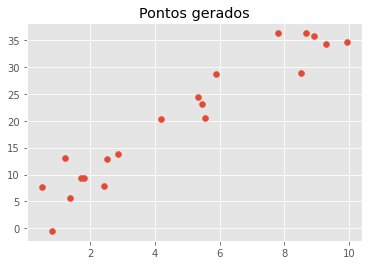

In [35]:
n = 20
x = ro.uniform(0,10, size = n)
epsilon = ro.normal(0, scale = 3, size = n)
beta0, beta1 = ro.uniform(0,10, size = 2)
y = beta0 + beta1*x + epsilon

plt.scatter(x,y)
plt.title('Pontos gerados')
plt.show()

Estimando os coeficientes

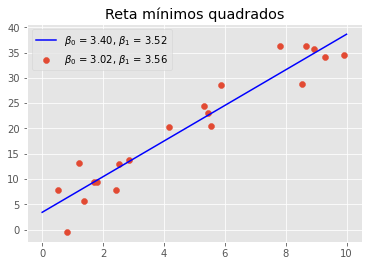

In [36]:
beta1_hat = np.dot(y - y.mean(), x - x.mean())/np.dot(x - x.mean(), x - x.mean())
beta0_hat = y.mean() - beta1_hat*x.mean()

t = np.linspace(0,10,1000)
plt.scatter(x,y, label = r'$\beta_0$ = {:.2f}, $\beta_1$ = {:.2f}'.format(beta0, beta1))
plt.plot(t,beta0_hat + beta1_hat*t, color = 'blue', label = r'$\beta_0$ = {:.2f}, $\beta_1$ = {:.2f}'.format(beta0_hat, beta1_hat))
plt.legend()
plt.title('Reta mínimos quadrados')
plt.show()

Agora vamos usar numpy para a estimação. Observe que o resultado coincide com o calculado usando a fórmula derivada. 

In [51]:
# adiciona coluna de 1 para lidar com o beta_0
xlinha = np.c_[np.ones(n),x]   
sol, _, _, _ = np.linalg.lstsq(xlinha, y, rcond = None)
print(sol)

[3.40285283 3.52323316]


### Várias variáveis 

Nesse caso, queremos encontrar um hiperplano que minimiza 

$$
Q = \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_{i1} + \dots + \beta_k x_{ik}))^2
$$

Nesse caso teremos $k+1$ equações para resolver. 

## Regressão

Dizemos que $X_1, \dots, X_k$ são preditores e $Y$ é a resposta. A esperança condicional da resposta dados os preditores é chamada de função regressão. Assim a regressão de $Y$ sobre $X_1, \dots, X_k$ depende dos valores $x_1, \dots, x_k$ assumidos pelos preditores. Vamos assumir que estamos com uma regressão linear e, portanto, 

$$
E[Y|x_1,\dots,x_k] = \beta_0 + \beta_1 x_1 + \dots \beta_k x_k
$$

onde os coeficientes $\beta_j$ são coeficientes de regressão, que são desconhecidos (parâmetros do modelo). 

### Regressão Linear Simples 

Nesse caso $Y = \beta_0 + \beta_1 x + \varepsilon$ para cada $X = x$ e, em geral, $\varepsilon \sim N(0, \sigma^2)$. 

Assumimos que 

1. Os preditores são conhecidos; 
2. A distribuição de $Y$ condicionada em $x_1, ..., x_n$ é normal. 
3. A média condicional é linear com parâmetros $\beta_0$ e $\beta_1$.
4. Homoscedasticidade, isto é, variância constante. 
5. Independência das respostas dadas as covariáveis. 

**Teorema:** Os estimadores de máxima verossimilhança de $\beta_0$ e $\beta_1$ são os de mínimos quadrados e de $\sigma^2$ é 
$$
\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{\beta}_0 - \hat{\beta}_1x_i)^2
$$

**Distribuição dos estimadores:** Considere os estimadores de mínimos quadrados como função das variáveis aleatórias $Y_1,...,Y_n$ dados os preditores $x_1,...,x_n$.

$$
\hat{\beta}_1 \sim \mathcal{N}(\beta_1, \sigma^2/s_x^2)
$$

$$
\hat{\beta}_0 \sim \mathcal{N}\left(\beta_0, \sigma^2\left(\frac{1}{n} + \frac{\bar{x}^2}{s_x^2}\right)\right)
$$

tal que $Cov(\hat{\beta}_0, \hat{\beta}_1) = \frac{\bar{x}\sigma^2}{s_x^2}$. As distribuições são todas condicionadas em $X_i = x_i$. 

## Inferência sobre regressão linear simples